# "Covid-19 Dashboard: Auto-updated"

- badges: false
- author: Akshith Sriram

##### <center>Welcome! This version of the dashboard updates itself everyday with the latest information.</center>


In [1]:
#collapse

from datetime import datetime

import pandas as pd
import numpy as np

# For making web-requests to the website
import requests
import json

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
%matplotlib inline

from IPython.core.display import display,HTML

latest_df = pd.read_csv("https://api.covid19india.org/csv/latest/state_wise_daily.csv")

latest_df.head()

df_1 = latest_df[(latest_df.Status == "Confirmed")]

df_1 = df_1.drop(columns = ["Status"])

df_2 = latest_df[(latest_df.Status == "Deceased")]

df_2 = df_2.drop(columns = ["Status"])

df_1["Date"] = df_1["Date"].astype('datetime64[ns]')



update = latest_df.iloc[-1,0]
cases = df_1.TT.sum()
new = df_1.iloc[-1,1]
deaths = df_2.TT.sum()

df_new = df_2.iloc[-1,1]

overview = '''
<!-- #######  HTML!! #########-->
<h1 style="color: #5e9ca0; text-align: center;">India</h1>
<p style="text-align: center;">Last update: <strong>{update}</strong></p>
<p style="text-align: center;">Confirmed cases:</p>
<p style="text-align: center;font-size:24px;">{cases} (<span style="color: #ff0000;">+{new}</span>)</p>
<p style="text-align: center;">Confirmed deaths:</p>
<p style="text-align: center;font-size:24px;">{deaths} (<span style="color: #ff0000;">+{df_new}</span>)</p>
'''


html = HTML(overview.format(update=update, cases=cases,new=new,deaths=deaths,df_new=df_new))

display(html)

In [2]:
#collapse
current_time = datetime.now().time() # time object
print("Last Updated: ", current_time)

Last Updated:  00:06:29.544554


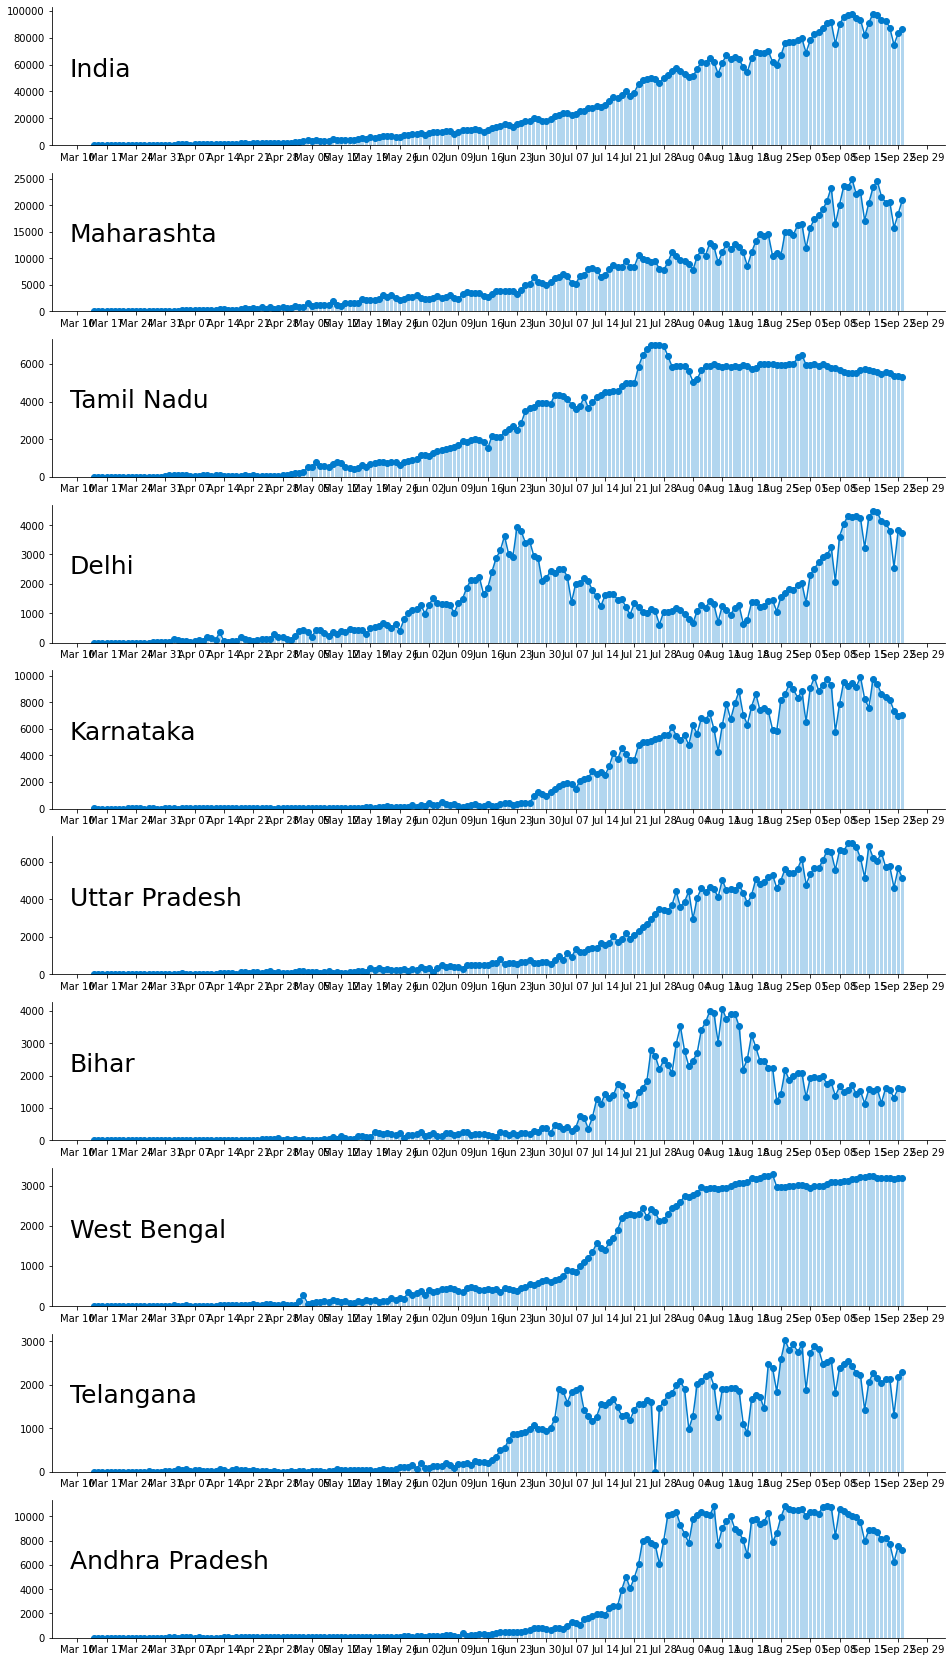

In [3]:
#collapse

# For ten states
n = 10

st = ["TT", "MH", "TN", "DL", "KA", "UP", "BR", "WB", "TG", "AP"]
state_name = ["India", "Maharashta", "Tamil Nadu", "Delhi", "Karnataka", "Uttar Pradesh", "Bihar", "West Bengal", "Telangana", "Andhra Pradesh"]

fig = plt.figure(figsize = (16,30))
gridspec = fig.add_gridspec(n, 3)

for i in range(n):
    ax = fig.add_subplot(gridspec[i, :])
    ax.bar(df_1.Date,df_1[st[i]],alpha=0.3,color='#007acc')
    ax.plot(df_1.Date,df_1[st[i]] , marker="o", color='#007acc')
    ax.xaxis.set_major_locator(mdates.WeekdayLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax.text(0.02, 0.5,state_name[i], transform = ax.transAxes, fontsize=25)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

In [4]:
#hide
## Help taken from Anshuman's Notebook